In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression

In [9]:
df = pd.read_csv("./music_clean.csv")
df = df.drop("Unnamed: 0", axis = 1)
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [12]:
X = df.drop("genre", axis=1)
y = df["genre"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=21)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet(),
    "Logistic Regression": LogisticRegression()
}

In [15]:
results = []
for model in models.values():
  kf = KFold(n_splits = 5, shuffle = True, random_state = 21)
  result = cross_val_score(model, X_train_scaled, y_train, cv = kf)
  results.append(result)

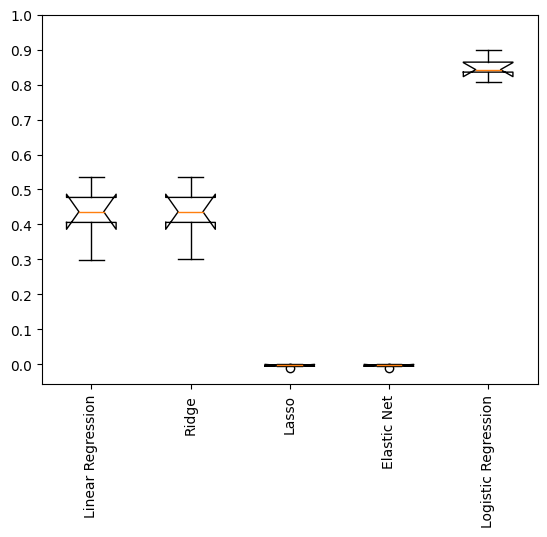

In [22]:
plt.boxplot(results, models.keys())
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(1, len(models.keys()) + 1), models.keys(), rotation = 90)
plt.show()